In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Data

In [2]:
df_cluster_data = pd.read_csv(r'C:\Users\AnudeepAyinaparthi\Desktop\T20 Clustering Project\Data\df_final_cluster_match.csv')
df_all_matches = pd.read_csv(r'C:\Users\AnudeepAyinaparthi\Desktop\T20 Clustering Project\Data\T20_all_matches.csv')

In [3]:
df_cluster = df_cluster_data.copy()

In [4]:
df_cluster.head()

,match_id,batting_team,ball,total_runs,wicket,start_date,total_runs_powerplay,wicket_powerplay,batting_team_inn2,ball_inn2,total_runs_inn2,wicket_inn2,total_runs_powerplay_inn2,wicket_powerplay_inn2,bat_first_win
0,913633,Sri Lanka,19.6,140,10.0,2016-07-05,59,2.0,England,17.3,144,2.0,47,2.0,0.0
1,913663,England,19.6,135,7.0,2016-09-07,57,1.0,Pakistan,14.5,139,1.0,77,0.0,0.0
2,936155,South Africa,19.3,113,10.0,2017-01-22,46,3.0,Sri Lanka,19.4,119,7.0,44,3.0,0.0
3,936157,South Africa,19.6,169,5.0,2017-01-25,55,1.0,Sri Lanka,19.5,170,5.0,55,2.0,0.0
4,995467,Australia,19.6,263,3.0,2016-09-06,81,1.0,Sri Lanka,19.6,178,9.0,67,3.0,1.0


In [5]:
# Drop columns which will not be used for clustering
df_cluster.drop(columns=['match_id','batting_team_inn2','batting_team','start_date'],inplace=True)

## Check for null values

In [6]:
df_cluster.isnull().sum()

ball                         0
total_runs                   0
wicket                       0
total_runs_powerplay         0
wicket_powerplay             0
ball_inn2                    0
total_runs_inn2              0
wicket_inn2                  0
total_runs_powerplay_inn2    0
wicket_powerplay_inn2        0
bat_first_win                0
dtype: int64

In [7]:
## Check for infinite values
np.isinf(df_cluster).values.sum()

0

## Date Preprocessing

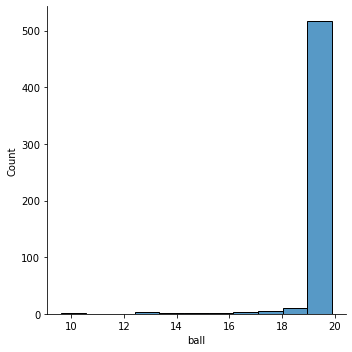

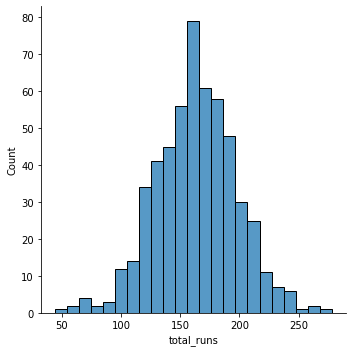

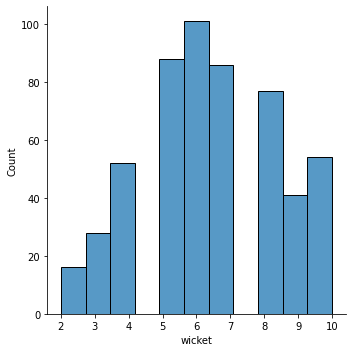

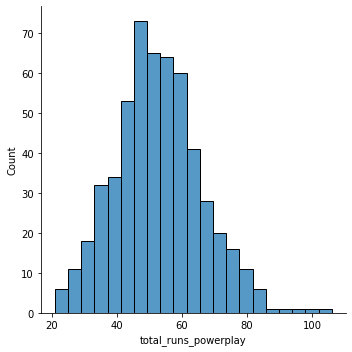

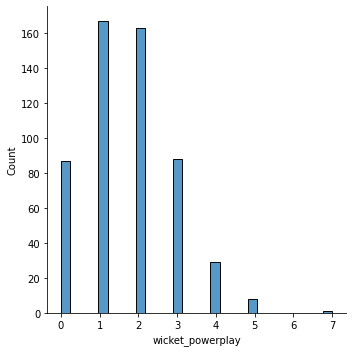

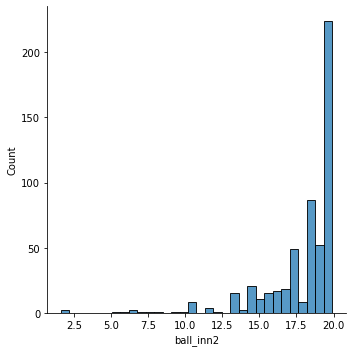

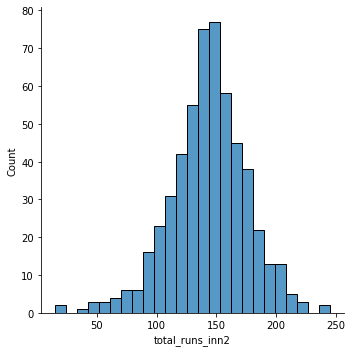

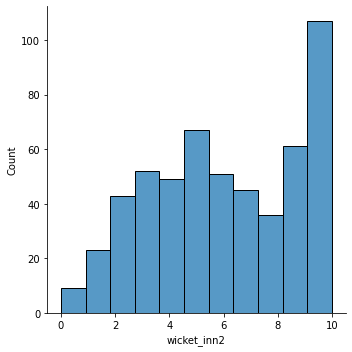

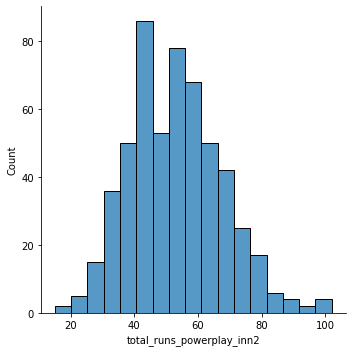

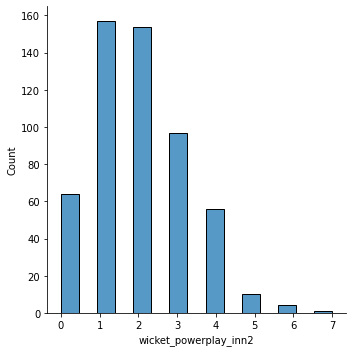

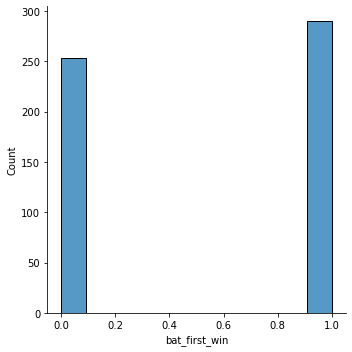

In [8]:
# Number of balls in the first and second innings are Left Tailed so I will have to transform them. Wickets in innings 2 is
# also unsymmetrical so I will need to transform it. I will transform wickets innings 1 as well to keep it consistent. The
# rest of the columns have a fairly symmetrical, normal distribution.
for col in df_cluster.columns:
    sns.displot(df_cluster[col])

In [9]:
# Mean and variance is different for these columns so I will need to scale it
df_cluster.describe()

,ball,total_runs,wicket,total_runs_powerplay,wicket_powerplay,ball_inn2,total_runs_inn2,wicket_inn2,total_runs_powerplay_inn2,wicket_powerplay_inn2,bat_first_win
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.477532,163.239411,6.440147,52.953959,1.694291,17.876243,142.979742,6.121547,52.926335,1.953959,0.534070
std,0.823531,34.237958,2.071510,13.220236,1.188236,2.643157,32.498220,2.963486,14.581939,1.297065,0.499298
min,9.600000,44.000000,2.000000,21.000000,0.000000,1.600000,15.000000,0.000000,15.000000,0.000000,0.000000
25%,19.600000,142.000000,5.000000,44.000000,1.000000,17.200000,125.000000,4.000000,42.000000,1.000000,0.000000
50%,19.600000,163.000000,6.000000,52.000000,2.000000,19.100000,144.000000,6.000000,52.000000,2.000000,1.000000
75%,19.600000,185.000000,8.000000,61.000000,2.000000,19.600000,163.000000,9.000000,63.000000,3.000000,1.000000
max,19.900000,278.000000,10.000000,106.000000,7.000000,19.900000,245.000000,10.000000,102.000000,7.000000,1.000000


## Transforming

In [10]:
## Log Scaling
df_transformed_log = np.log(df_cluster[['ball','ball_inn2','wicket','wicket_inn2']])

In [11]:
## Cuberoot Scaling
df_transformed_cuberoot = (df_cluster[['ball','ball_inn2','wicket','wicket_inn2']])**(1/3)

In [12]:
## Boxcox scaling
## Add +1 to the data so that we can apply the boxcox transformation
df_cluster['wicket_shift_1'] = df_cluster['wicket'] + 1
df_cluster['wicket_inn2_shift_1'] = df_cluster['wicket_inn2'] + 1
df_cluster['wicket_powerplay_shift_1'] = df_cluster['wicket_powerplay'] + 1
df_cluster['wicket_powerplay_inn2_shift_1'] = df_cluster['wicket_powerplay_inn2'] + 1

df_transformed_boxcox = pd.DataFrame([])
for column in ['ball','ball_inn2','wicket_shift_1','wicket_inn2_shift_1','wicket_powerplay_shift_1','wicket_powerplay_inn2_shift_1']:
    print(column)
    fitted_data, fitted_lambda = stats.boxcox(df_cluster[column])
    df_transformed_boxcox[column] = fitted_data

ball
ball_inn2
wicket_shift_1
wicket_inn2_shift_1
wicket_powerplay_shift_1
wicket_powerplay_inn2_shift_1


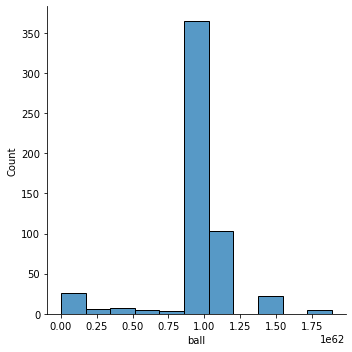

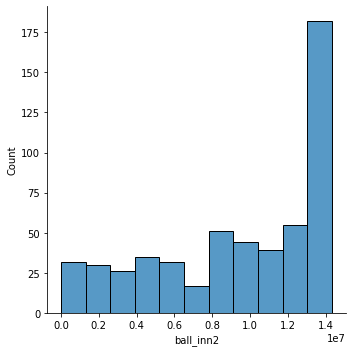

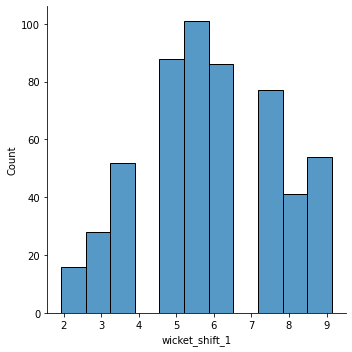

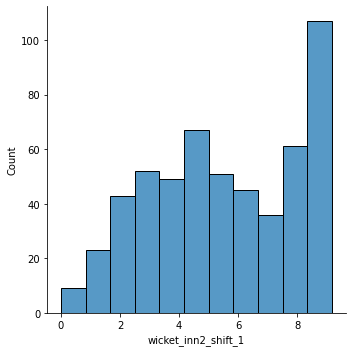

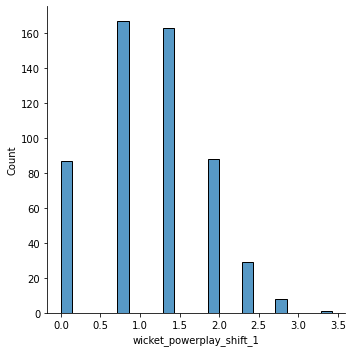

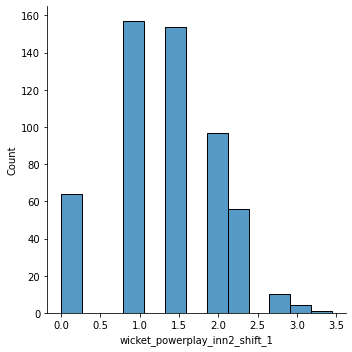

In [13]:
for column in df_transformed_boxcox.columns:
    sns.displot(df_transformed_boxcox[column])

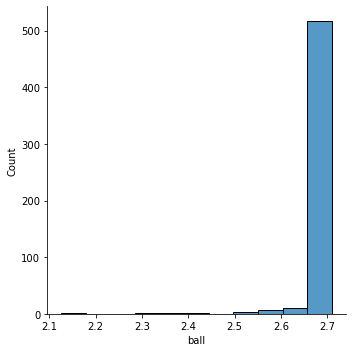

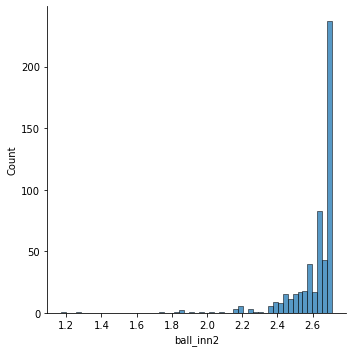

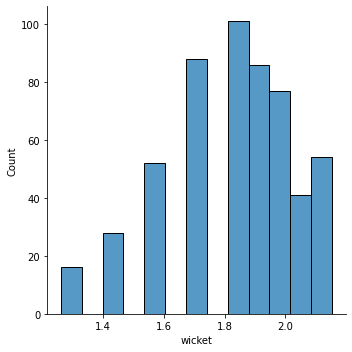

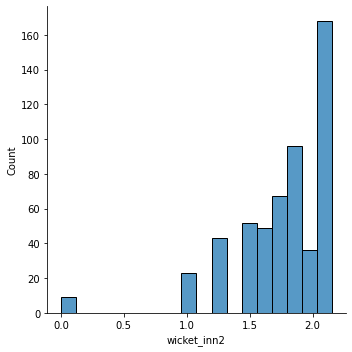

In [14]:
for column in df_transformed_cuberoot.columns:
    sns.displot(df_transformed_cuberoot[column])

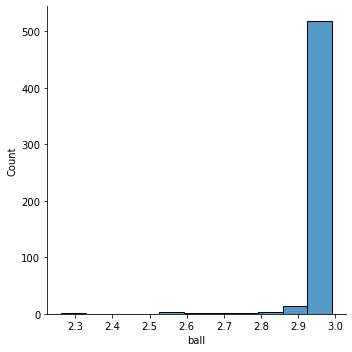

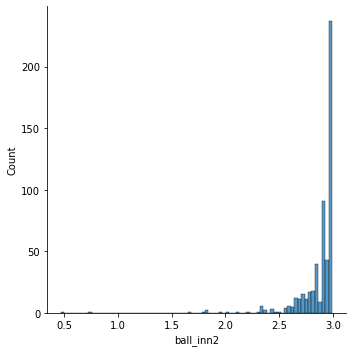

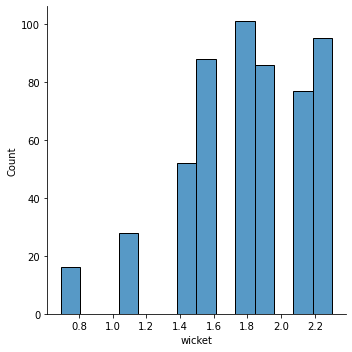

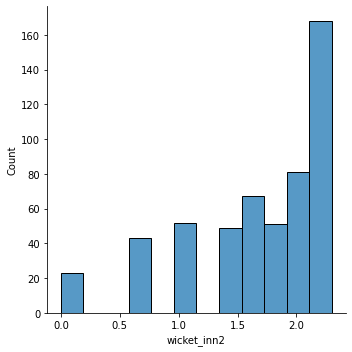

In [15]:
for column in df_transformed_log.columns:
    sns.displot(df_transformed_log[column])

## Boxcox scaling looks like it is the best so that is what we will use

In [16]:
## Normalising data
df_transformed_boxcox[['total_runs','total_runs_powerplay','total_runs_inn2','total_runs_powerplay_inn2','bat_first_win']] = df_cluster[['total_runs','total_runs_powerplay','total_runs_inn2','total_runs_powerplay_inn2','bat_first_win']]

In [18]:
df_transformed_boxcox.drop(columns=['ball','ball_inn2'],inplace=True)

In [19]:
# Scale data
# Normalize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_transformed_boxcox)
# Store for clustering
df_cluster_normalized = pd.DataFrame(scaler.transform(df_transformed_boxcox),index=df_transformed_boxcox.index,columns=df_transformed_boxcox.columns)

In [21]:
df_cluster_normalized.describe()

,wicket_shift_1,wicket_inn2_shift_1,wicket_powerplay_shift_1,wicket_powerplay_inn2_shift_1,total_runs,total_runs_powerplay,total_runs_inn2,total_runs_powerplay_inn2,bat_first_win
count,5.430000e+02,5.430000e+02,5.430000e+02,5.430000e+02,5.430000e+02,5.430000e+02,5.430000e+02,5.430000e+02,5.430000e+02
mean,-1.807435e-16,4.544145e-16,5.397769e-17,-3.680297e-18,4.135734e-16,1.779833e-16,3.441589e-16,-1.533457e-16,7.646840e-17
std,1.000922e+00,1.000922e+00,1.000922e+00,1.000922e+00,1.000922e+00,1.000922e+00,1.000922e+00,1.000922e+00,1.000922e+00
min,-2.178885e+00,-2.119081e+00,-1.657952e+00,-1.794079e+00,-3.485878e+00,-2.419278e+00,-3.941685e+00,-2.603310e+00,-1.070628e+00
25%,-6.903418e-01,-7.066781e-01,-4.957229e-01,-6.765238e-01,-6.209189e-01,-6.779165e-01,-5.537633e-01,-7.499970e-01,-1.070628e+00
50%,-2.046085e-01,-2.881979e-02,3.704618e-01,1.584750e-01,-6.998999e-03,-7.222557e-02,3.142322e-02,-6.358478e-02,9.340309e-01
75%,7.559177e-01,9.695713e-01,3.704618e-01,8.505254e-01,6.361552e-01,6.091767e-01,6.166097e-01,6.914687e-01,9.340309e-01
max,1.704675e+00,1.298608e+00,3.243097e+00,2.937115e+00,3.354943e+00,4.016188e+00,3.142151e+00,3.368476e+00,9.340309e-01


## Clustering

## Find ideal number of clusters

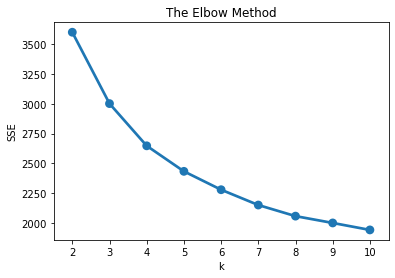

In [22]:
# Import key libraries
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(2, 11):    
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_cluster_normalized)
    sse[k] = kmeans.inertia_ 
# sum of squared distances to closest cluster center
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

## From the above plot it looks like the best number of clusters is between 4-6

In [23]:
## 4 Cluster Segmentation
kmeans = KMeans(n_clusters=4,random_state=1)
kmeans.fit(df_cluster_normalized)
cluster_labels = kmeans.labels_
df_cluster_k4 = df_cluster.assign(Cluster=cluster_labels)

In [24]:
## 5 cluster segmentation
kmeans = KMeans(n_clusters=5,random_state=1)
kmeans.fit(df_cluster_normalized)
cluster_labels = kmeans.labels_
df_cluster_k5 = df_cluster.assign(Cluster=cluster_labels)

In [25]:
## 6 cluster segmentation
kmeans = KMeans(n_clusters=6,random_state=1)
kmeans.fit(df_cluster_normalized)
cluster_labels = kmeans.labels_
df_cluster_k6 = df_cluster.assign(Cluster=cluster_labels)